<a href="https://colab.research.google.com/github/blondeincode/Analysis_of_stroke_occurrences/blob/main/Analysis_of_stroke_occurrences(matplotlib_visualizations).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of an anonymized sample of the National Health Fund data on the occurrence of ischemic stroke

In [66]:
import os
import urllib.request
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import seaborn as sns

def thousands_formatter(x, pos):
  return f'{x / 1000}'

def millions_formatter(x, pos):
  return f'{x / 1000000}'
    
plt.style.use('fivethirtyeight')

In [ ]:
# Create path to data file
DATA_DIR = os.path.join('data')
DATA_URL = 'https://www.dropbox.com/s/rr3sbnz8hz7u5xo/health_services.zip?dl=1'
DATA_FILENAME = 'data.zip'
DATA_FILEPATH = 'os.path.join(DATA_DIR, DATA_FILENAME)'

In [ ]:
def init_directories():
  if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

In [ ]:
data = urllib.request.urlretrieve(DATA_URL, DATA_FILEPATH)

In [ ]:
init_directories()

with zipfile.ZipFile(DATA_FILEPATH, 'r') as zip_ref:
    zip_ref.extractall(DATA_DIR) 

In [ ]:
for path, subdirs, files in os.walk('data'):
    for name in files:
        print(os.path.join(path, name))

data/diagnosis.csv
data/patient_parameters.csv
data/health_benefits.csv
data/prescriptions.csv
data/procedures.csv
data/patients.csv


In [ ]:
# How many unique patients and for what total amount (settled amount) have dental services (type of services) used?
services = pd.read_csv('data/health_benefits.csv', header=0, 
                       usecols=['ID_PACJENTA','ID_EPIZODU','ID_KONTAKTU','KOD_ZAKRESU','RODZAJ_SWIADCZEN','KWOTA_ROZLICZONA'], 
                       sep=';', encoding='ISO-8859-2', low_memory=False)
services.columns=['PATIENT_ID','EPISODE_ID','CONTACT_ID','RANGE_CODE','TYPE_OF_SERVICES','SETTLED_AMOUNT']
services.head()

,PATIENT_ID,EPISODE_ID,CONTACT_ID,RANGE_CODE,TYPE_OF_SERVICES,SETTLED_AMOUNT
0,21466,55625667,20359413,1506110,PODSTAWOWA OPIEKA ZDROWOTNA,0
1,197685,84652115,98978481,1506110,PODSTAWOWA OPIEKA ZDROWOTNA,0
2,21466,13879209,82087452,1506110,PODSTAWOWA OPIEKA ZDROWOTNA,0
3,372836,46476951,43672487,1506110,PODSTAWOWA OPIEKA ZDROWOTNA,0
4,845904,87283796,28396473,1506110,PODSTAWOWA OPIEKA ZDROWOTNA,0


In [ ]:
services['TYPE_OF_SERVICES'].unique()

array(['PODSTAWOWA OPIEKA ZDROWOTNA',
       'AMBULATORYJNE \x8cWIADCZENIA SPECJALISTYCZNE',
       'LECZENIE SZPITALNE',
       'OPIEKA PSYCHIATRYCZNA I LECZENIE UZALEŻNIEŃ',
       'REHABILITACJA LECZNICZA', 'LECZENIE STOMATOLOGICZNE',
       'PROFILAKTYCZNE PROGRAMY ZDROWOTNE',
       '\x8cWIADCZENIA ODRĘBNIE KONTRAKTOWANE',
       '\x8cWIADCZENIA PIELĘGNACYJNE I OPIEKUŃCZE',
       'OPIEKA PALIATYWNA I HOSPICYJNA', 'RATOWNICTWO MEDYCZNE'],
      dtype=object)

In [ ]:
services['TYPE_OF_SERVICES'] = services['TYPE_OF_SERVICES'].replace('PODSTAWOWA OPIEKA ZDROWOTNA', 'BASIC HEALTH CARE')
services['TYPE_OF_SERVICES'] = services['TYPE_OF_SERVICES'].replace('AMBULATORYJNE \x8cWIADCZENIA SPECJALISTYCZNE', 
                                                                    'AMBULATORY SPECIALIZED SERVICES')
services['TYPE_OF_SERVICES'] = services['TYPE_OF_SERVICES'].replace('LECZENIE SZPITALNE', 'HOSPITAL TREATMENT')
services['TYPE_OF_SERVICES'] = services['TYPE_OF_SERVICES'].replace('OPIEKA PSYCHIATRYCZNA I LECZENIE UZALEŻNIEŃ', 
                                                                    'PSYCHIATRIC CARE AND TREATMENT OF ADDICTIONS')
services['TYPE_OF_SERVICES'] = services['TYPE_OF_SERVICES'].replace('REHABILITACJA LECZNICZA', 'MEDICAL REHABILITATION')
services['TYPE_OF_SERVICES'] = services['TYPE_OF_SERVICES'].replace('LECZENIE STOMATOLOGICZNE', 'DENTAL TREATMENT')
services['TYPE_OF_SERVICES'] = services['TYPE_OF_SERVICES'].replace('PROFILAKTYCZNE PROGRAMY ZDROWOTNE', 
                                                                    'PREVENTIVE HEALTH PROGRAMS')
services['TYPE_OF_SERVICES'] = services['TYPE_OF_SERVICES'].replace('\x8cWIADCZENIA ODRĘBNIE KONTRAKTOWANE', 
                                                                    'SEPARATELY CONTRACTED SERVICES')
services['TYPE_OF_SERVICES'] = services['TYPE_OF_SERVICES'].replace('\x8cWIADCZENIA PIELĘGNACYJNE I OPIEKUŃCZE', 
                                                                    'NURSING AND CARE SERVICES')
services['TYPE_OF_SERVICES'] = services['TYPE_OF_SERVICES'].replace('OPIEKA PALIATYWNA I HOSPICYJNA', 
                                                                    'PALLIATIVE AND HOSPICE CARE')
services['TYPE_OF_SERVICES'] = services['TYPE_OF_SERVICES'].replace('RATOWNICTWO MEDYCZNE', 'EMERGENCY MEDICAL SERVICES')

In [ ]:
services['TYPE_OF_SERVICES'].unique()

array(['BASIC HEALTH CARE', 'AMBULATORY SPECIALIZED SERVICES',
       'HOSPITAL TREATMENT',
       'PSYCHIATRIC CARE AND TREATMENT OF ADDICTIONS',
       'MEDICAL REHABILITATION', 'DENTAL TREATMENT',
       'PREVENTIVE HEALTH PROGRAMS', 'SEPARATELY CONTRACTED SERVICES',
       'NURSING AND CARE SERVICES', 'PALLIATIVE AND HOSPICE CARE',
       'EMERGENCY MEDICAL SERVICES'], dtype=object)

In [ ]:
q1 = services[services['TYPE_OF_SERVICES'] == 'DENTAL TREATMENT']
q1 = q1.drop(q1.columns[[1,2,3]], axis=1)
q1 = q1.reset_index(drop=True)
q1['PATIENT_ID'] = pd.DataFrame(pd.unique(q1['PATIENT_ID']))
q1.dropna(inplace=True)
q1['PATIENT_ID'] = q1['PATIENT_ID'].astype(int)
q1['SETTLED_AMOUNT'] = [x.replace(',', '.') for x in q1['SETTLED_AMOUNT']]
q1['SETTLED_AMOUNT'] = q1['SETTLED_AMOUNT'].astype(float)
q1.head()

,PATIENT_ID,TYPE_OF_SERVICES,SETTLED_AMOUNT
0,273852,DENTAL TREATMENT,11.99
1,843595,DENTAL TREATMENT,13.20
2,194784,DENTAL TREATMENT,14.85
3,463704,DENTAL TREATMENT,13.75
4,534663,DENTAL TREATMENT,13.75


In [ ]:
#Number of all patients who have received dental treatment.
len(q1['PATIENT_ID'])

146542

In [ ]:
#The settled amount includes all patients who received dental treatment.
round(sum(q1['SETTLED_AMOUNT']),2)

4713307.04

In [ ]:
#What unique diagnoses were diagnosed in patients settled by the range code 3103275?
q2 = services[services['RANGE_CODE'] == 3103275]
q2 = q2.drop(q2.columns[[4,5]], axis=1)
q2 = q2.reset_index(drop=True)
q2['CONTACT_ID'] = pd.DataFrame(pd.unique(q2['CONTACT_ID']))
q2.dropna(inplace=True)
q2['CONTACT_ID'] = q2['CONTACT_ID'].astype(int)
q2

,PATIENT_ID,EPISODE_ID,CONTACT_ID,RANGE_CODE
0,743986,96464725,74139818,3103275
1,413007,93290748,38476599,3103275
2,396168,43927760,81214251,3103275
3,413007,90963650,99878533,3103275


In [ ]:
diagnosis = pd.read_csv('data/diagnosis.csv', header=0, sep=';')
diagnosis.columns=['CONTACT_ID','DIAGNOSIS_CODE','IS_THIS_THE_MAIN_DIAGNOSIS?']
diagnosis

,CONTACT_ID,DIAGNOSIS_CODE,IS_THIS_THE_MAIN_DIAGNOSIS?
0,86184950,42069,T
1,77833278,60015,T
2,39973459,507306,T
3,96091782,7809601,T
4,91312211,9401202,T
...,...,...,...
12798622,31497318,42069,N
12798623,26119441,83031,N
12798624,59227640,87008,N
12798625,91798570,8300606,N


In [ ]:
q2 = pd.merge(q2, diagnosis, on='CONTACT_ID')
q2

,PATIENT_ID,EPISODE_ID,CONTACT_ID,RANGE_CODE,DIAGNOSIS_CODE,IS_THIS_THE_MAIN_DIAGNOSIS?
0,743986,96464725,74139818,3103275,4100102,T
1,413007,93290748,38476599,3103275,4100102,T
2,396168,43927760,81214251,3103275,4105402,T
3,413007,90963650,99878533,3103275,4100102,T


In [ ]:
q2 = q2.drop(q2.columns[[0,1,2,3,5]], axis=1)
q2 = q2.reset_index(drop=True)
q2['DIAGNOSIS_CODE'] = pd.DataFrame(pd.unique(q2['DIAGNOSIS_CODE']))
q2.dropna(inplace=True)
q2['DIAGNOSIS_CODE'] = q2['DIAGNOSIS_CODE'].astype(int)
q2

,DIAGNOSIS_CODE
0,4100102
1,4105402


In [ ]:
patients = pd.read_csv('data/patients.csv', header=0, usecols=['ID_PACJENTA','CZY_UDAR'], sep=';')
patients.columns=['PATIENT_ID','WAS_THERE_A_STROKE?']
patients.head()

,PATIENT_ID,WAS_THERE_A_STROKE?
0,9910,False
1,953308,False
2,936540,False
3,902346,False
4,894583,False


In [ ]:
#How many unique episodes do patients who have not been diagnosed with stroke have in their history?
q3 = pd.merge(services[['PATIENT_ID','EPISODE_ID']], patients, on='PATIENT_ID', how='left')
q3 = q3.reset_index(drop=True)
q3['EPISODE_ID'] = pd.DataFrame(pd.unique(q3['EPISODE_ID']))
q3.dropna(inplace=True)
q3['EPISODE_ID'] = q3['EPISODE_ID'].astype(int)
q3 = q3[q3['WAS_THERE_A_STROKE?'] == False]
q3

,PATIENT_ID,EPISODE_ID,WAS_THERE_A_STROKE?
0,21466,55625667,False
1,197685,84652115,False
2,21466,13879209,False
3,372836,46476951,False
4,845904,87283796,False
...,...,...,...
10526190,919990,21379731,False
10526191,798048,16425409,False
10526192,798048,8034156,False
10526193,798048,43052692,False


In [ ]:
len(q3['EPISODE_ID'])

10432109

In [ ]:
# How many drug packages were issued in total? 
prescriptions = pd.read_csv('data/prescriptions.csv', header=0, usecols=['ID_PACJENTA','ID_RECEPTY','LICZBA_OPAKOWAN'], sep=';')
prescriptions.columns=['PATIENT_ID','PRESCRIPTION_ID','NUMBER_OF_PACKAGES']
prescriptions['NUMBER_OF_PACKAGES'] = [x.replace(',', '.') for x in prescriptions['NUMBER_OF_PACKAGES']]
prescriptions['NUMBER_OF_PACKAGES'] = prescriptions['NUMBER_OF_PACKAGES'].astype(float)
prescriptions

,PATIENT_ID,PRESCRIPTION_ID,NUMBER_OF_PACKAGES
0,84791,1647291,1.0
1,727677,9780539,1.0
2,727677,9780539,2.0
3,860373,5235544,1.0
4,860373,5235544,1.0
...,...,...,...
8410121,713781,5848253,3.0
8410122,713781,5544505,1.0
8410123,713781,3538335,1.0
8410124,296911,8017125,2.0


In [ ]:
round(sum(prescriptions['NUMBER_OF_PACKAGES']),0)

14063698.0

In [ ]:
#What percentage are patients who have been diagnosed with a stroke?  

q4 = patients.groupby('WAS_THERE_A_STROKE?')['PATIENT_ID'].count()
q4 = q4.to_frame().reset_index()
q4 = q4.rename(columns= {'PATIENT_ID': 'NUMBER_OF_PATIENTS'})
q4['WAS_THERE_A_STROKE?'] = q4['WAS_THERE_A_STROKE?'].astype(str)
q4['WAS_THERE_A_STROKE?'] = [x.replace('False', 'Not diagnosed') for x in q4['WAS_THERE_A_STROKE?']]
q4['WAS_THERE_A_STROKE?'] = [x.replace('True', 'Diagnosed') for x in q4['WAS_THERE_A_STROKE?']]
q4['WAS_THERE_A_STROKE?'] = q4['WAS_THERE_A_STROKE?'].astype(object)
q4

,WAS_THERE_A_STROKE?,NUMBER_OF_PATIENTS
0,Not diagnosed,497029
1,Diagnosed,2971


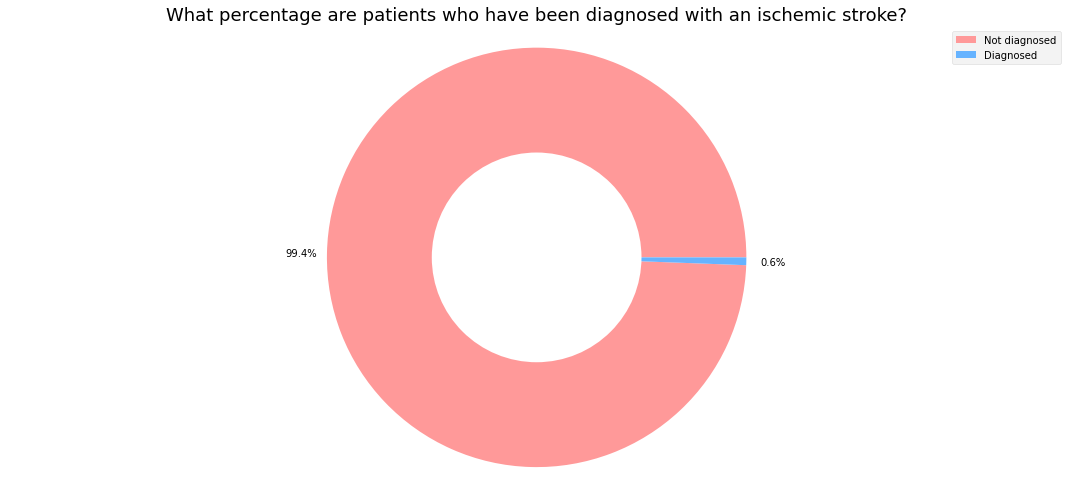

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.title('What percentage are patients who have been diagnosed with an ischemic stroke?', fontdict = {'fontsize' : 18})
ax.pie(q4['NUMBER_OF_PATIENTS'], colors = ['#ff9999','#66b3ff'], autopct='%1.1f%%', startangle=0, pctdistance=1.125)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.legend(['Not diagnosed','Diagnosed'])
plt.show()

In [ ]:
parameters = pd.read_csv('data/patient_parameters.csv', header=0, sep=';', encoding='ISO-8859-2')
parameters.columns=['PATIENT_ID','AGE_GROUP','GENDER','DISTRICT_TERRITORY']
parameters.head()

,PATIENT_ID,AGE_GROUP,GENDER,DISTRICT_TERRITORY
0,792137,"(73,78]",2,2212.0
1,366964,"(38,43]",2,2207.0
2,786905,"(63,68]",1,2209.0
3,210416,"(23,28]",2,2216.0
4,643866,"(58,63]",1,2263.0


In [ ]:
# Adding the column 'WAS_THERE_A_STROKE?'
parameters = pd.merge(parameters, patients, on='PATIENT_ID', how='left')
parameters = parameters.reset_index(drop=True)
parameters.head()

,PATIENT_ID,AGE_GROUP,GENDER,DISTRICT_TERRITORY,WAS_THERE_A_STROKE?
0,792137,"(73,78]",2,2212.0,False
1,366964,"(38,43]",2,2207.0,False
2,786905,"(63,68]",1,2209.0,False
3,210416,"(23,28]",2,2216.0,False
4,643866,"(58,63]",1,2263.0,False


In [ ]:
#Patients who have been diagnosed with a stroke
parameters_with_stroke = parameters[parameters['WAS_THERE_A_STROKE?'] == True]
parameters_with_stroke

,PATIENT_ID,AGE_GROUP,GENDER,DISTRICT_TERRITORY,WAS_THERE_A_STROKE?
171,710295,"(58,63]",1,2204.0,True
183,794086,"(88,93]",1,2262.0,True
212,881668,"(68,73]",2,2262.0,True
218,887188,"(58,63]",2,2213.0,True
489,223491,"(58,63]",1,2261.0,True
...,...,...,...,...,...
499439,990364,"(88,93]",1,2202.0,True
499476,906285,"(78,83]",2,2210.0,True
499598,872536,"(88,93]",2,2211.0,True
499806,94967,"(68,73]",1,2263.0,True


In [ ]:
#How many patients in each age group have had a stroke?
q5 = parameters_with_stroke.groupby('AGE_GROUP', as_index=False).agg({"PATIENT_ID": "count"})
q5= q5.reindex([17,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0])
q5 = q5.reset_index(drop=True)
q5 = q5.rename(columns= {'PATIENT_ID': 'NUMBER_OF_PATIENTS'})
q5

,AGE_GROUP,NUMBER_OF_PATIENTS
0,"[18,23]",5
1,"(23,28]",8
2,"(28,33]",19
3,"(33,38]",31
4,"(38,43]",53
5,"(43,48]",89
6,"(48,53]",95
7,"(53,58]",206
8,"(58,63]",325
9,"(63,68]",424


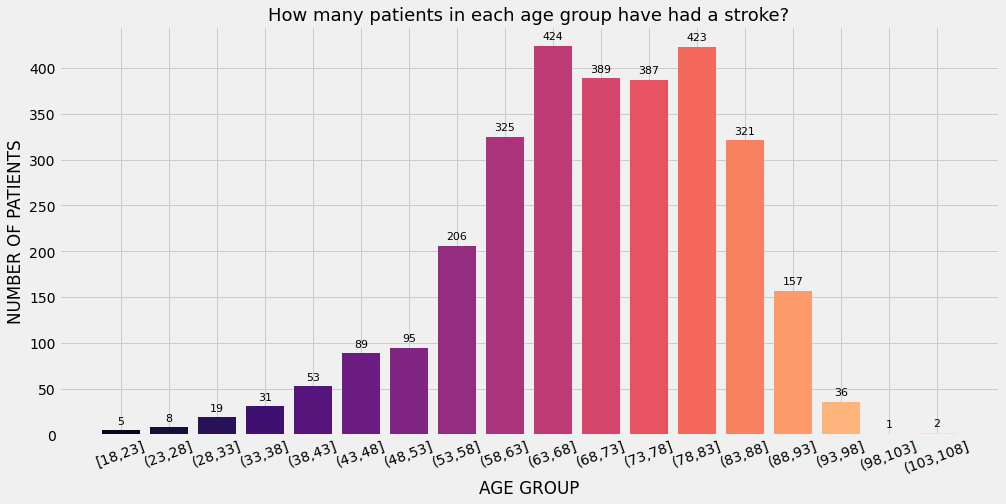

In [59]:
fig1, ax = plt.subplots(figsize=(15, 7))
plt.title('How many patients in each age group have had a stroke?', fontdict = {'fontsize' : 18})
ax.bar(q5['AGE_GROUP'], q5['NUMBER_OF_PATIENTS'], width=0.8, color=sns.color_palette('magma', 18))
for i in q5.index:
    ax.annotate(f"{q5['NUMBER_OF_PATIENTS'][i]}", xy=(i, q5['NUMBER_OF_PATIENTS'][i] + 10), va = 'center', ha='center', 
                fontsize=11, fontweight='light', color='black')
ax.set_xticklabels(q5['AGE_GROUP'], rotation=20) 
ax.set_xlabel('AGE GROUP')
ax.set_ylabel('NUMBER OF PATIENTS')
plt.show()

In [ ]:
#Patients who have not been diagnosed with a stroke
parameters_without_stroke = parameters[parameters['WAS_THERE_A_STROKE?'] == False]
parameters_without_stroke

,PATIENT_ID,AGE_GROUP,GENDER,DISTRICT_TERRITORY,WAS_THERE_A_STROKE?
0,792137,"(73,78]",2,2212.0,False
1,366964,"(38,43]",2,2207.0,False
2,786905,"(63,68]",1,2209.0,False
3,210416,"(23,28]",2,2216.0,False
4,643866,"(58,63]",1,2263.0,False
...,...,...,...,...,...
499995,182191,"(53,58]",1,2215.0,False
499996,933352,"(33,38]",2,2213.0,False
499997,653177,"(28,33]",2,2207.0,False
499998,476208,"(38,43]",2,2209.0,False


In [ ]:
#How many patients in each age group have not had a stroke?
q6 = parameters_without_stroke.groupby('AGE_GROUP', as_index=False).agg({"PATIENT_ID": "count"})
q6 = q6.reindex([18,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0,1])
q6 = q6.reset_index(drop=True)
q6 = q6.rename(columns= {'PATIENT_ID': 'NUMBER_OF_PATIENTS'})
q6

,AGE_GROUP,NUMBER_OF_PATIENTS
0,"[18,23]",36295
1,"(23,28]",39963
2,"(28,33]",43517
3,"(33,38]",45480
4,"(38,43]",43213
5,"(43,48]",37571
6,"(48,53]",35333
7,"(53,58]",40415
8,"(58,63]",46658
9,"(63,68]",42669


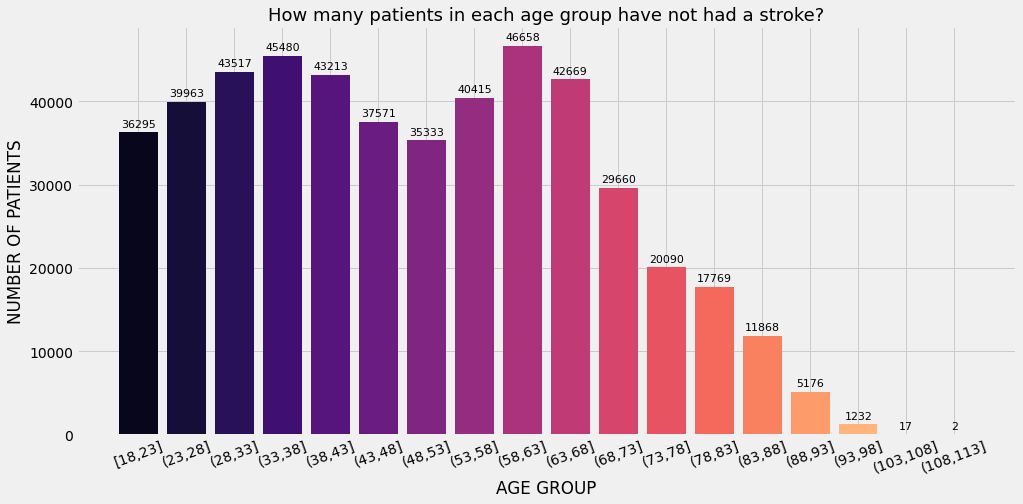

In [61]:
#How many patients in each age group have not had a stroke?
fig2, ax = plt.subplots(figsize=(15, 7))
plt.title('How many patients in each age group have not had a stroke?', fontdict = {'fontsize' : 18})
ax.bar(q6['AGE_GROUP'], q6['NUMBER_OF_PATIENTS'], width=0.8, color=sns.color_palette("magma", 18))
for i in q6.index:
    ax.annotate(f"{q6['NUMBER_OF_PATIENTS'][i]}", xy=(i, q6['NUMBER_OF_PATIENTS'][i] + 1000), va = 'center', ha='center', 
                fontsize=11, fontweight='light', color='black')
ax.set_xticklabels(q6['AGE_GROUP'], rotation=20)  
ax.set_xlabel('AGE GROUP')
ax.set_ylabel('NUMBER OF PATIENTS')
plt.show()

In [ ]:
#Patients diagnosed with stroke by gender
q7 = parameters_with_stroke.groupby('GENDER')['PATIENT_ID'].count()
q7 = q7.to_frame().reset_index()
q7 = q7.rename(columns= {'PATIENT_ID': 'NUMBER_OF_PATIENTS'})
q7['GENDER'] = q7['GENDER'].astype(str)
q7['GENDER'] = [x.replace('1', 'Woman') for x in q7['GENDER']]
q7['GENDER'] = [x.replace('2', 'Man') for x in q7['GENDER']]
q7

,GENDER,NUMBER_OF_PATIENTS
0,Woman,1360
1,Man,1611


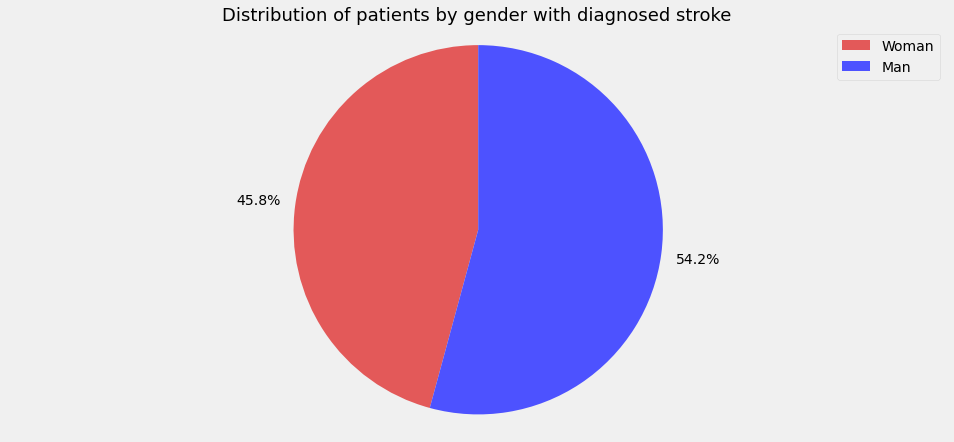

In [62]:
fig3, ax = plt.subplots(figsize=(15, 7))
plt.title('Distribution of patients by gender with diagnosed stroke', fontdict = {'fontsize' : 18})
ax.pie(q7['NUMBER_OF_PATIENTS'], colors = ['#e35959','#4d52ff'], autopct='%1.1f%%', startangle=90, pctdistance=1.2)
ax.axis('equal')  
plt.legend(['Woman','Man'])
plt.show()

In [ ]:
#Patients not diagnosed with stroke by gender 
q8 = parameters_without_stroke.groupby('GENDER')['PATIENT_ID'].count()
q8 = q8.to_frame().reset_index()
q8 = q8.rename(columns= {'PATIENT_ID': 'NUMBER_OF_PATIENTS'})
q8['GENDER'] = q8['GENDER'].astype(str)
q8['GENDER'] = [x.replace('1', 'Woman') for x in q8['GENDER']]
q8['GENDER'] = [x.replace('2', 'Man') for x in q8['GENDER']]
q8

,GENDER,NUMBER_OF_PATIENTS
0,Woman,224886
1,Man,272143


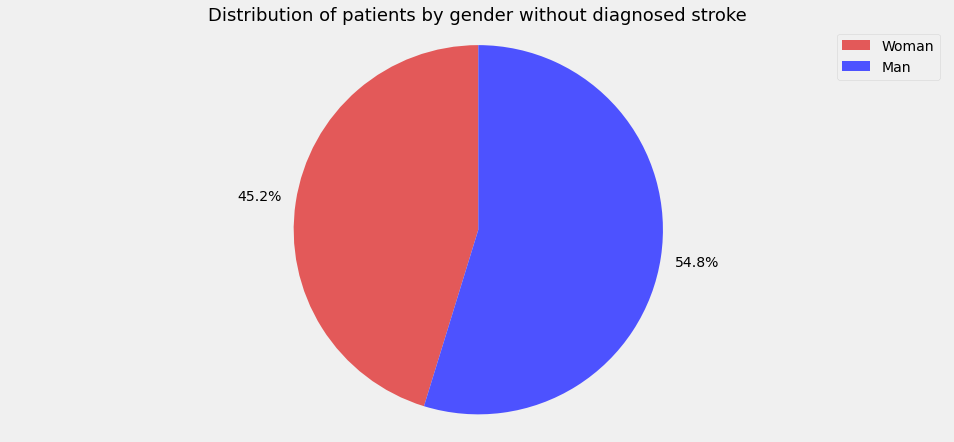

In [63]:
fig4, ax = plt.subplots(figsize=(15, 7))
plt.title('Distribution of patients by gender without diagnosed stroke', fontdict = {'fontsize' : 18})
ax.pie(q8['NUMBER_OF_PATIENTS'], colors = ['#e35959','#4d52ff'], autopct='%1.1f%%', startangle=90, pctdistance=1.2)
ax.axis('equal')  
plt.legend(['Woman','Man'])
plt.show()

In [ ]:
#The number of patients (descending) diagnosed with stroke divided into district territory code
q9 = parameters_with_stroke.groupby('DISTRICT_TERRITORY')['PATIENT_ID'].count()
q9 = q9.to_frame().reset_index()
q9 = q9.rename(columns= {'PATIENT_ID': 'NUMBER_OF_PATIENTS'})
q9 = q9.sort_values(by=['NUMBER_OF_PATIENTS'], ascending=False)
q9 = q9.reset_index(drop=True)
q9['DISTRICT_TERRITORY'] = q9['DISTRICT_TERRITORY'].astype(int)
q9 = q9[0:15]
q9

,DISTRICT_TERRITORY,NUMBER_OF_PATIENTS
0,1465,111
1,1061,76
2,1261,44
3,3064,42
4,461,37
5,663,36
6,2261,36
7,2464,35
8,3262,35
9,264,31


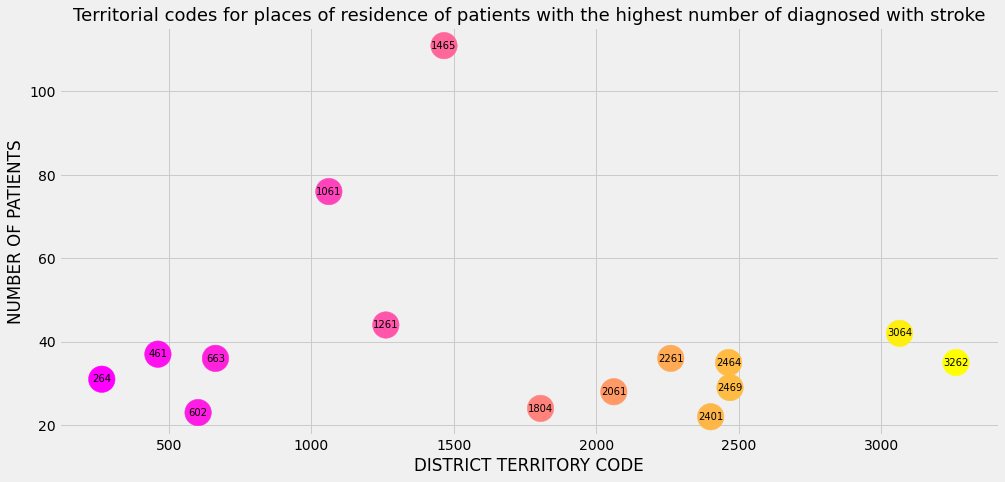

In [64]:
#Territorial codes for places of residence of patients with the highest number of diagnosed with stroke
fig5, ax = plt.subplots(figsize=(15,7))
plt.scatter(q9['DISTRICT_TERRITORY'], q9['NUMBER_OF_PATIENTS'], marker='o', s=700, c=q9['DISTRICT_TERRITORY'], cmap='spring')
plt.title('Territorial codes for places of residence of patients with the highest number of diagnosed with stroke', 
          fontdict = {'fontsize' : 18})
ax.set_xlabel('DISTRICT TERRITORY CODE')
ax.set_ylabel('NUMBER OF PATIENTS') 
for i, txt in enumerate(q9['DISTRICT_TERRITORY']):
  plt.annotate(txt, (q9['DISTRICT_TERRITORY'][i], q9['NUMBER_OF_PATIENTS'][i]), va = 'center', ha='center', fontsize=10, 
               fontweight='light', color='black')   
plt.show()

In [ ]:
# What health services did patients diagnosed with stroke use?
q10 = pd.merge(services[['PATIENT_ID','TYPE_OF_SERVICES','SETTLED_AMOUNT']], patients, on='PATIENT_ID', how='left')
q10 = q10.reset_index(drop=True)
q10.dropna(inplace=True)
q10

,PATIENT_ID,TYPE_OF_SERVICES,SETTLED_AMOUNT,WAS_THERE_A_STROKE?
0,21466,BASIC HEALTH CARE,0,False
1,197685,BASIC HEALTH CARE,0,False
2,21466,BASIC HEALTH CARE,0,False
3,372836,BASIC HEALTH CARE,0,False
4,845904,BASIC HEALTH CARE,0,False
...,...,...,...,...
13451974,636866,EMERGENCY MEDICAL SERVICES,0,False
13451975,212614,EMERGENCY MEDICAL SERVICES,0,False
13451976,641569,EMERGENCY MEDICAL SERVICES,0,False
13451977,112823,EMERGENCY MEDICAL SERVICES,0,False


In [ ]:
services_with_stroke = q10[q10['WAS_THERE_A_STROKE?'] == True]
services_with_stroke

,PATIENT_ID,TYPE_OF_SERVICES,SETTLED_AMOUNT,WAS_THERE_A_STROKE?
35,173065,BASIC HEALTH CARE,0,True
266,62772,BASIC HEALTH CARE,0,True
806,453229,BASIC HEALTH CARE,0,True
1725,813276,BASIC HEALTH CARE,0,True
1732,813276,BASIC HEALTH CARE,0,True
...,...,...,...,...
13451658,813758,EMERGENCY MEDICAL SERVICES,0,True
13451810,132302,EMERGENCY MEDICAL SERVICES,0,True
13451869,205750,EMERGENCY MEDICAL SERVICES,0,True
13451931,79058,EMERGENCY MEDICAL SERVICES,0,True


In [ ]:
#How many patients diagnosed with stroke benefited from each health service?
q11 = services_with_stroke.groupby('TYPE_OF_SERVICES')['PATIENT_ID'].count()
q11 = q11.to_frame().reset_index()
q11 = q11.rename(columns= {'PATIENT_ID': 'NUMBER_OF_PATIENTS'})
q11 = q11.sort_values(by=['NUMBER_OF_PATIENTS'], ascending=False)
q11 = q11.reset_index(drop=True)
q11

,TYPE_OF_SERVICES,NUMBER_OF_PATIENTS
0,BASIC HEALTH CARE,44801
1,AMBULATORY SPECIALIZED SERVICES,24416
2,MEDICAL REHABILITATION,19918
3,HOSPITAL TREATMENT,14526
4,DENTAL TREATMENT,4691
5,PSYCHIATRIC CARE AND TREATMENT OF ADDICTIONS,1816
6,NURSING AND CARE SERVICES,1748
7,SEPARATELY CONTRACTED SERVICES,1501
8,EMERGENCY MEDICAL SERVICES,1162
9,PALLIATIVE AND HOSPICE CARE,72


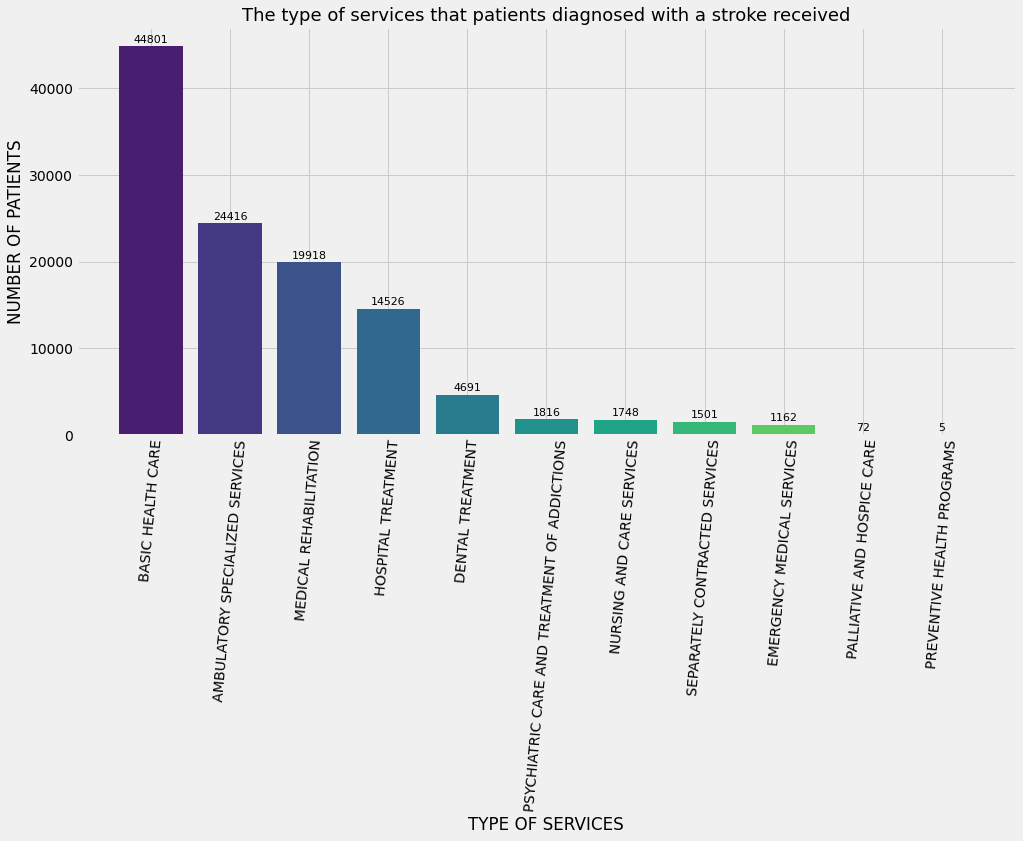

In [57]:
fig6, ax = plt.subplots(figsize=(15, 7))
plt.title('The type of services that patients diagnosed with a stroke received', fontdict = {'fontsize' : 18})
ax.bar(q11['TYPE_OF_SERVICES'], q11['NUMBER_OF_PATIENTS'], width=0.8, color=sns.color_palette("viridis", 11))
for i in q11.index:
  ax.annotate(f"{q11['NUMBER_OF_PATIENTS'][i]}", xy=(i, q11['NUMBER_OF_PATIENTS'][i] + 800), va = 'center', ha='center', fontsize=11, 
              fontweight='light', color='black')
ax.set_xticklabels(q11['TYPE_OF_SERVICES'], rotation=85)
ax.set_xlabel('TYPE OF SERVICES')
ax.set_ylabel('NUMBER OF PATIENTS') 
plt.show()

In [ ]:
#Was the diagnosis a primary one or a concomitant diagnosis?
what_diagnosis = pd.merge(services, diagnosis, on='CONTACT_ID')
what_diagnosis = what_diagnosis.drop(what_diagnosis.columns[[3,4,5,6]], axis=1)
what_diagnosis = what_diagnosis.reset_index(drop=True)
what_diagnosis

,PATIENT_ID,EPISODE_ID,CONTACT_ID,IS_THIS_THE_MAIN_DIAGNOSIS?
0,21466,55625667,20359413,T
1,197685,84652115,98978481,T
2,21466,13879209,82087452,T
3,372836,46476951,43672487,T
4,845904,87283796,28396473,T
...,...,...,...,...
15737274,636866,21379731,34447580,T
15737275,212614,16425409,19017953,T
15737276,641569,8034156,55524615,T
15737277,112823,43052692,19070800,T


In [ ]:
#Adding the column 'WAS_THERE_A_STROKE?'
what_diagnosis = pd.merge(what_diagnosis, patients, on='PATIENT_ID', how='left')
what_diagnosis = what_diagnosis.reset_index(drop=True)
what_diagnosis.dropna(inplace=True)
what_diagnosis

,PATIENT_ID,EPISODE_ID,CONTACT_ID,IS_THIS_THE_MAIN_DIAGNOSIS?,WAS_THERE_A_STROKE?
0,21466,55625667,20359413,T,False
1,197685,84652115,98978481,T,False
2,21466,13879209,82087452,T,False
3,372836,46476951,43672487,T,False
4,845904,87283796,28396473,T,False
...,...,...,...,...,...
15737274,636866,21379731,34447580,T,False
15737275,212614,16425409,19017953,T,False
15737276,641569,8034156,55524615,T,False
15737277,112823,43052692,19070800,T,False


In [ ]:
#Was the diagnosis primary or concomitant diagnosis? (patients diagnosed with a stroke)
diagnosis_with_stroke = what_diagnosis[what_diagnosis['WAS_THERE_A_STROKE?'] == True]
diagnosis_with_stroke = diagnosis_with_stroke.groupby('IS_THIS_THE_MAIN_DIAGNOSIS?')['PATIENT_ID'].count()
diagnosis_with_stroke = diagnosis_with_stroke.to_frame().reset_index()
diagnosis_with_stroke = diagnosis_with_stroke.rename(columns= {'PATIENT_ID': 'NUMBER_OF_PATIENTS_DIAGNOSED_WITH_STROKE'})
diagnosis_with_stroke = diagnosis_with_stroke.sort_values(by=['NUMBER_OF_PATIENTS_DIAGNOSED_WITH_STROKE'], ascending=True)
diagnosis_with_stroke['IS_THIS_THE_MAIN_DIAGNOSIS?'] = [x.replace('N', 'Concomitant diagnosis') for x 
                                                        in diagnosis_with_stroke['IS_THIS_THE_MAIN_DIAGNOSIS?']]
diagnosis_with_stroke['IS_THIS_THE_MAIN_DIAGNOSIS?'] = [x.replace('T', 'Main diagnosis') for x 
                                                        in diagnosis_with_stroke['IS_THIS_THE_MAIN_DIAGNOSIS?']]
diagnosis_with_stroke

,IS_THIS_THE_MAIN_DIAGNOSIS?,NUMBER_OF_PATIENTS_DIAGNOSED_WITH_STROKE
0,Concomitant diagnosis,27574
1,Main diagnosis,114656


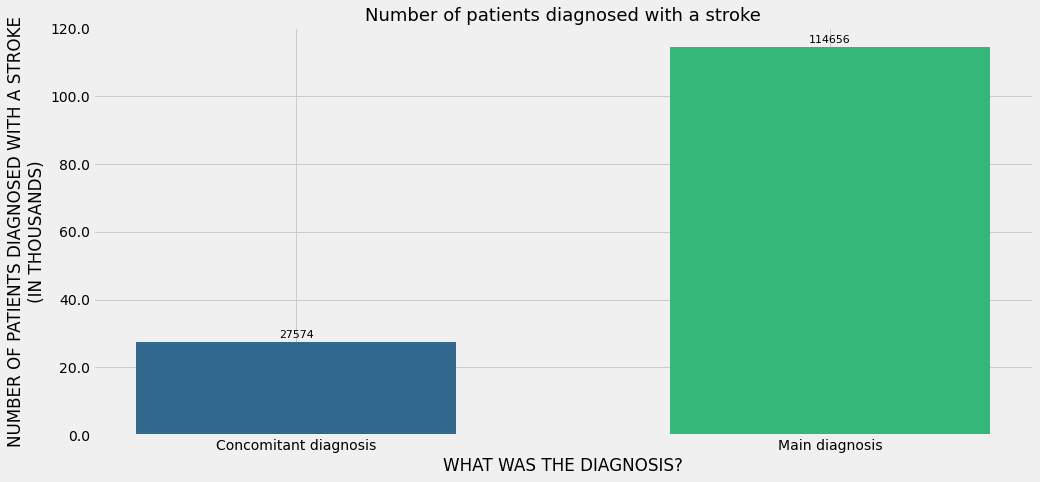

In [68]:
fig7, ax = plt.subplots(figsize=(15, 7))
plt.title('Number of patients diagnosed with a stroke', fontdict = {'fontsize' : 18})
ax.bar(diagnosis_with_stroke['IS_THIS_THE_MAIN_DIAGNOSIS?'], diagnosis_with_stroke['NUMBER_OF_PATIENTS_DIAGNOSED_WITH_STROKE'], 
       width=0.6, color=sns.color_palette("viridis", 2))
for i in diagnosis_with_stroke.index:
  ax.annotate(f"{diagnosis_with_stroke['NUMBER_OF_PATIENTS_DIAGNOSED_WITH_STROKE'][i]}", 
              xy=(i, diagnosis_with_stroke['NUMBER_OF_PATIENTS_DIAGNOSED_WITH_STROKE'][i] + 2000), va = 'center', ha='center', 
              fontsize=11, fontweight='light', color='black')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax.set_xticklabels(diagnosis_with_stroke['IS_THIS_THE_MAIN_DIAGNOSIS?'], rotation=0)
ax.set_xlabel('WHAT WAS THE DIAGNOSIS?')
ax.set_ylabel('NUMBER OF PATIENTS DIAGNOSED WITH A STROKE' + '\n(IN THOUSANDS)') 
plt.show()

In [ ]:
#Was the diagnosis primary or concomitant diagnosis? (patients without a diagnosed stroke)
diagnosis_without_stroke = what_diagnosis[what_diagnosis['WAS_THERE_A_STROKE?'] == False]
diagnosis_without_stroke = diagnosis_without_stroke.groupby('IS_THIS_THE_MAIN_DIAGNOSIS?')['PATIENT_ID'].count()
diagnosis_without_stroke = diagnosis_without_stroke.to_frame().reset_index()
diagnosis_without_stroke = diagnosis_without_stroke.rename(columns= {'PATIENT_ID': 'NUMBER_OF_PATIENTS_WITHOUT_DIAGNOSED_STROKE'})
diagnosis_without_stroke = diagnosis_without_stroke.sort_values(by=['NUMBER_OF_PATIENTS_WITHOUT_DIAGNOSED_STROKE'], ascending=True)
diagnosis_without_stroke['IS_THIS_THE_MAIN_DIAGNOSIS?'] = [x.replace('N', 'Concomitant diagnosis') for x 
                                                           in diagnosis_without_stroke['IS_THIS_THE_MAIN_DIAGNOSIS?']]
diagnosis_without_stroke['IS_THIS_THE_MAIN_DIAGNOSIS?'] = [x.replace('T', 'Main diagnosis') for x 
                                                           in diagnosis_without_stroke['IS_THIS_THE_MAIN_DIAGNOSIS?']]
diagnosis_without_stroke

,IS_THIS_THE_MAIN_DIAGNOSIS?,NUMBER_OF_PATIENTS_WITHOUT_DIAGNOSED_STROKE
0,Concomitant diagnosis,2257744
1,Main diagnosis,13337305


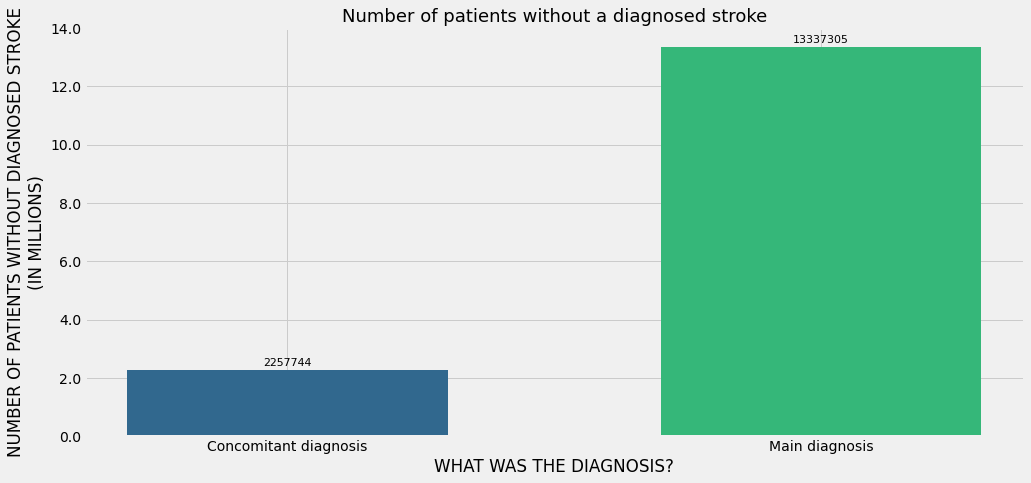

In [70]:
fig8, ax = plt.subplots(figsize=(15, 7))
plt.title('Number of patients without a diagnosed stroke', fontdict = {'fontsize' : 18})
ax.bar(diagnosis_without_stroke['IS_THIS_THE_MAIN_DIAGNOSIS?'], diagnosis_without_stroke['NUMBER_OF_PATIENTS_WITHOUT_DIAGNOSED_STROKE'], 
       width=0.6, color=sns.color_palette("viridis", 2))
for i in diagnosis_without_stroke.index:
  ax.annotate(f"{diagnosis_without_stroke['NUMBER_OF_PATIENTS_WITHOUT_DIAGNOSED_STROKE'][i]}", 
              xy=(i, diagnosis_without_stroke['NUMBER_OF_PATIENTS_WITHOUT_DIAGNOSED_STROKE'][i] + 250000), va = 'center', ha='center', 
              fontsize=11, fontweight='light', color='black')
ax.set_xticklabels(diagnosis_without_stroke['IS_THIS_THE_MAIN_DIAGNOSIS?'], rotation=0)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel('WHAT WAS THE DIAGNOSIS?')
ax.set_ylabel('NUMBER OF PATIENTS WITHOUT DIAGNOSED STROKE' + '\n(IN MILLIONS)') 
plt.show()

In [ ]:
q12 = pd.merge(diagnosis_with_stroke, diagnosis_without_stroke)
q12

,IS_THIS_THE_MAIN_DIAGNOSIS?,NUMBER_OF_PATIENTS_DIAGNOSED_WITH_STROKE,NUMBER_OF_PATIENTS_WITHOUT_DIAGNOSED_STROKE
0,Concomitant diagnosis,27574,2257744
1,Main diagnosis,114656,13337305


In [ ]:
q12 = q12.melt(id_vars='IS_THIS_THE_MAIN_DIAGNOSIS?').rename(columns=str.title)
q12['Variable'] = [x.replace('_', ' ') for x in q12['Variable']]
q12

,Is_This_The_Main_Diagnosis?,Variable,Value
0,Concomitant diagnosis,NUMBER OF PATIENTS DIAGNOSED WITH STROKE,27574
1,Main diagnosis,NUMBER OF PATIENTS DIAGNOSED WITH STROKE,114656
2,Concomitant diagnosis,NUMBER OF PATIENTS WITHOUT DIAGNOSED STROKE,2257744
3,Main diagnosis,NUMBER OF PATIENTS WITHOUT DIAGNOSED STROKE,13337305


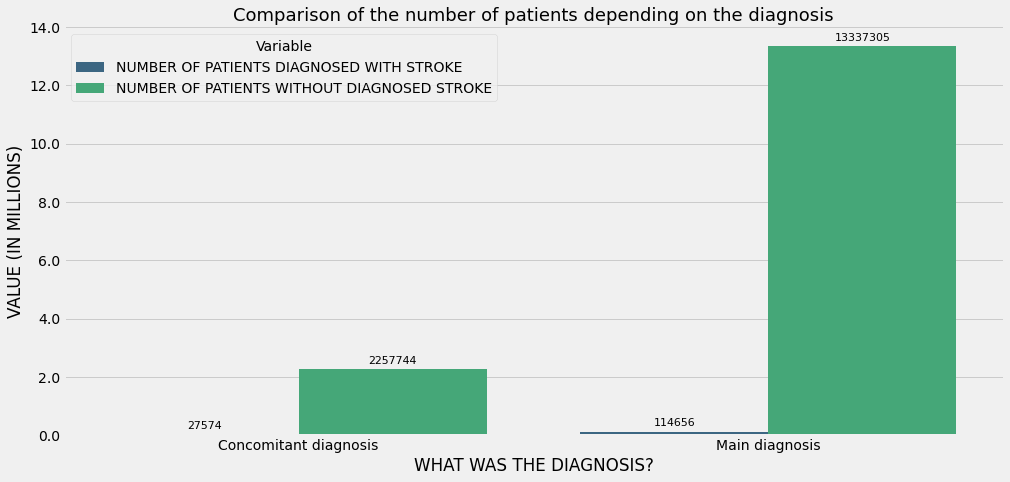

In [76]:
fig9, ax = plt.subplots(figsize=(15, 7))
plt.title('Comparison of the number of patients depending on the diagnosis', fontdict = {'fontsize' : 18})
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter)) 
g = sns.barplot(x='Is_This_The_Main_Diagnosis?', y='Value', hue='Variable', data=q12, ax=ax, palette="viridis")
sns.despine(fig9)
ax.set_xlabel('WHAT WAS THE DIAGNOSIS?')
ax.set_ylabel('VALUE (IN MILLIONS)')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
               fontsize=11, fontweight='light', xytext = (0, 9), textcoords = 'offset points')
plt.show()